# Projeto 1 - Ciência dos Dados

Nome: Adney Costa Moura

Nome: Lister Ogusuku Ribeiro

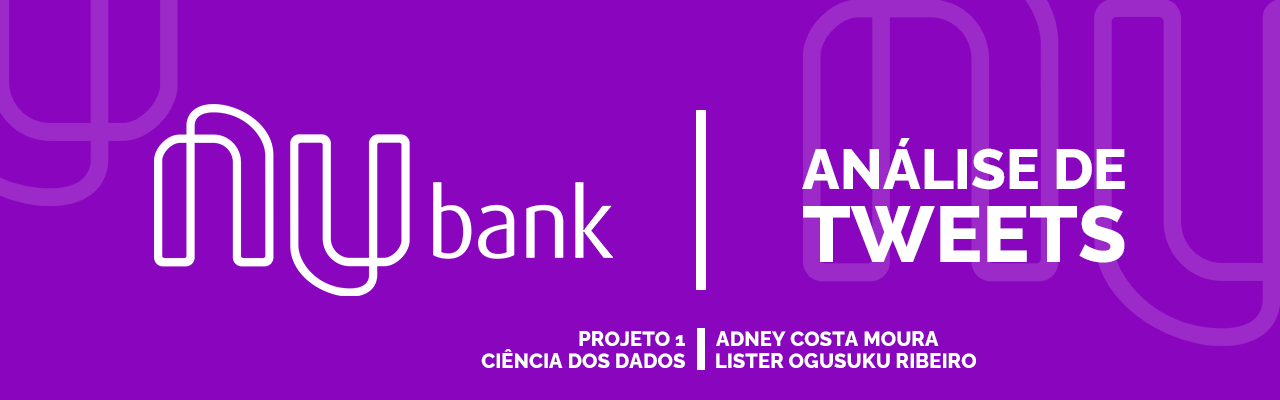

___
Carregando algumas bibliotecas:

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\adney\OneDrive - Insper - Institudo de Ensino e Pesquisa\Documentos\2° semestre - Insper\Ciência dos Dados\ProjetoCdados_AdneyLister


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [3]:
filename = 'nubank.xlsx'

In [4]:
train = pd.read_excel(filename)
train.head(5)

,Treinamento,Relevância
0,@nubank você me ilude tão bem 🤩🤩🤩,0
1,"vou ter que fazer parcelamento da parcela, eu ...",0
2,@hs_ramao @nubank aumentaram o meu e eu nem us...,1
3,hoje eu mal acordei e tava pegando ônibus o re...,0
4,🤣🤣🤣 @nubank vamos amigar https://t.co/7k6syhkxf0,0


In [5]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,Relevância
0,"@ogustamlk gu, obrigado por nos avisar sobre i...",0
1,@nubank nubank libera logo meu cartao de crédi...,1
2,nubank foi o melhor cartão que eu já fiz até h...,1
3,@nubank quer casar cmg?,0
4,"aeeee carai, nubank aceitou meu crédito :3",1


___
## Classificador automático de sentimento


Nosso produto foi a startup de serviços financeiros Nubank. Consideramos como relevante as operações que envolvem o limite de crédito, interação com o cliente e reclamações.

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

#### Função de limpeza que troca sinais básicos por espaços:

In [6]:
import re 


def cleanup(text):
    punctuation = '[!-.:?;]'
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed

#### Separando cada row do Data Frame, fazendo um split das palavras e limpando cada frase. Além disso, cada linha foi filtrada por sua classificação na coluna "relevância":

In [7]:
lista_relevante = []
lista_irrelevante = []

for i in range(0,500):
    # Separando os rows do DataFrame
    x = cleanup(train.Treinamento[i]).lower().split()
 
    if train.iloc[i,1] == 1:
        j = 0
        while j < len(x):
            lista_relevante.append(x[j])
            j+=1
        
    else:
        k = 0
        while k < len(x):
            lista_irrelevante.append(x[k])
            k+=1

#### Limpando os "@" e links dos tweets:

In [8]:
contador_r = 0
contador_irr = 0

while contador_r < len(lista_relevante):
    
    # Limpando os links da lista relevante
    if lista_relevante[contador_r][0:5] == 'https':
        del(lista_relevante[contador_r])
        
    # Limpando os @ da lista relevante
    for s in lista_relevante[contador_r]:
        if s == '@':
            lista_relevante[contador_r] = lista_relevante[contador_r].replace(s,'')
            
    contador_r+=1


while contador_irr < len(lista_irrelevante):
    
    # Limpando os links da lista irrelevante
    if lista_irrelevante[contador_irr][0:5] == 'https':
        del(lista_irrelevante[contador_irr])
        
    # Limpando os @ da lista irrelevante
    for w in lista_irrelevante[contador_irr]:
        if w == '@':
            lista_irrelevante[contador_irr] = lista_irrelevante[contador_irr].replace(w,'')
            
    contador_irr+=1

# Separando os tweets relevantes, irrelevantes e totais

#### Tweets Relevantes:

##### Guardando as palavras como um pd.Series

In [9]:
serie_relevante = pd.Series(lista_relevante)

#### Frequências Absolutas:

In [10]:
tabela_relevante_absoluta = serie_relevante.value_counts()

#### Tweets Irrelevantes:

##### Guardando as palavras como um pd.Series

In [11]:
serie_irrelevante = pd.Series(lista_irrelevante)

#### Frequências Absolutas:

In [12]:
tabela_irrelevante_absoluta = serie_irrelevante.value_counts()

#### Tweets Totais:

##### Variável que guarda a soma da lista relevante + lista irrelevante e representa nosso conjunto de palavras totais

In [13]:
total = lista_relevante + lista_irrelevante 

In [14]:
total_series = pd.Series(total)

##### Frequências Absolutas:

In [15]:
tabela_total = total_series.value_counts()

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [16]:
lista_test = []
lista_relevante_test = []
lista_irrelevante_test = []

for i in range(0,300):
    x = cleanup(test.Teste[i]).lower().split()
    
    lista_test.append(x)
    
    if train.iloc[i,1] == 1:
        j = 0
        while j < len(x):
            lista_relevante_test.append(x[j])
            j+=1
        
    else:
        k = 0
        while k < len(x):
            lista_irrelevante_test.append(x[k])
            k+=1

In [17]:
test["Relevância_Classificador"] = 'a'
test.head()

,Teste,Relevância,Relevância_Classificador
0,"@ogustamlk gu, obrigado por nos avisar sobre i...",0,a
1,@nubank nubank libera logo meu cartao de crédi...,1,a
2,nubank foi o melhor cartão que eu já fiz até h...,1,a
3,@nubank quer casar cmg?,0,a
4,"aeeee carai, nubank aceitou meu crédito :3",1,a


### Contextualização

O algoritmo “Naive Bayes” é um classificador probabilístico baseado no “Teorema de Bayes”, o qual foi criado por Thomas Bayes (1701 - 1761) para tentar provar a existência de Deus.

Atualmente, esse algoritmo é utilizado na área de $Machine Learning$ tendo a funcionalidade de categorizar textos com base na frequência de palavras que aparecem no mesmo.

A melhor parte deste algoritmo vem da sua ingenuidade($naive$ em inglês)! Com isso nós queremos dizer que ele desconsidera a correlação de palavras(variáveis) e trata elas de forma independente.

Mas agora vamos as contas! Como de fato nós podemos utilizar esse algoritmo na programação?
Bom, trazendo esse projeto como exemplo, temos:

O teorema de Naive Bayes consiste em calcular probabilidades partindo de eventos posteriores(ser relevante, dado que foi classificado como relevante), multiplicando pela probabilidade de o tweet ser de fato relevante pela probabilidade “ser classificado como relevante, dado que o tweet é relevante”. De forma analoga isso se aplica para os tweets irrelevantes.

Como a soma dessas probabilidades para os tweets relevantes e irrelevantes deve resultar em 1, é necessário normalizar esses valores e isso é feito dividindo cada um desses pela soma de ambos.

Mas agora vamos mostrar isso com um pouco de matemática:

###### Definindo algumas probabilidades:
- $P(Tweet|Relevante)$: probabilidade de classificar o tweet como relevante dado que o tweet é relevante;
- $P(Tweet|Irrelevante)$: probabilidade de classificar o tweet como irrelevante dado que o twwet é irrelevante;
- $P(Relevante)$: probabilidade do tweet ser relevante;
- $P(Irrelevante)$: probabilidade do tweet ser irrelevante;
- $P(Tweet)$: probabilidade de um tweet qualquer ocorrer.


$$P(Relevante|Tweet) = \frac{P(Tweet|Relevente) P(Relevante)}{P(Tweet)}$$

<br>

<br>

O processo é análogo para $P(Irrelevante|tweet)$:

$$P(Irrelevante|Tweet) = \frac{P(Tweet|Irrelevante) P(Irrelevante)}{P(Tweet)}$$


Agora vamos aplicar esse algoritmo no nosso projeto!

In [30]:
contador = 0
Pr = len(lista_relevante)/len(total)
Pi = len(lista_irrelevante)/len(total)
Prob_d_ser_relevante = []
Prob_d_ser_irrelevante = []

while contador < len(lista_test):
    
    acumulador_relevante = 1
    acumulador_irrelevante = 1

    for h in lista_test[contador]:

        if h not in lista_relevante:
            tabela_relevante_absoluta[h] = 0

        if h not in lista_irrelevante:
            tabela_irrelevante_absoluta[h] = 0

        acumulador_relevante *= ( tabela_relevante_absoluta[h] + 1 ) / ( len(lista_relevante) + tabela_total.shape[0] )
        acumulador_irrelevante *= ( tabela_irrelevante_absoluta[h] + 1 ) / ( len(lista_irrelevante) + tabela_total.shape[0] ) 
      
        
    # Probabilidades
    Prob_d_ser_relevante.append(Pr*acumulador_relevante)
    Prob_d_ser_irrelevante.append(Pi*acumulador_irrelevante)

    if Prob_d_ser_relevante[contador] > Prob_d_ser_irrelevante[contador]:
        test.loc[contador,["Relevância_Classificador"]] = 1

    else:
        test.loc[contador,["Relevância_Classificador"]] = 0
        
    contador = contador + 1

In [19]:
test.head()

,Teste,Relevância,Relevância_Classificador
0,"@ogustamlk gu, obrigado por nos avisar sobre i...",0,0
1,@nubank nubank libera logo meu cartao de crédi...,1,1
2,nubank foi o melhor cartão que eu já fiz até h...,1,1
3,@nubank quer casar cmg?,0,1
4,"aeeee carai, nubank aceitou meu crédito :3",1,1


##### Analisando o Classificador

In [31]:
Matriz_de_Comparação = pd.crosstab(test["Relevância"] , test["Relevância_Classificador"], normalize=True)*100
Matriz_de_Comparação

Relevância_Classificador,0,1
Relevância,,
0,27.666667,31.666667
1,5.000000,35.666667


In [32]:
print("Acuracia:{0:.2f}%".format(Matriz_de_Comparação[0][0] + Matriz_de_Comparação[1][1]))

Acuracia:63.33%


___
### Concluindo

___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

___
## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis
* Corrigir separação de espaços entre palavras e emojis ou entre emojis e emojis
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B)
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)


___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**

https://www.organicadigital.com/blog/algoritmo-de-classificacao-naive-bayes/